# ***Task 3 - Chip types data***

Read and process the data:

In [5]:
!python ./../chip_types_data_analysis.py

Figure(1500x500)


In [243]:
!python ./../esi_data_analysis.py

Figure(700x1000)
Figure(700x700)
Figure(400x400)
Figure(400x400)
Figure(400x400)
Figure(400x400)
Figure(400x400)
Figure(400x400)
Figure(400x400)
Figure(400x400)
Figure(400x400)
Figure(400x400)


In [ ]:
!python ./../liver_data_analysis.py

C:\Users\Leor\AppData\Local\Temp\ipykernel_12688\1483680560.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


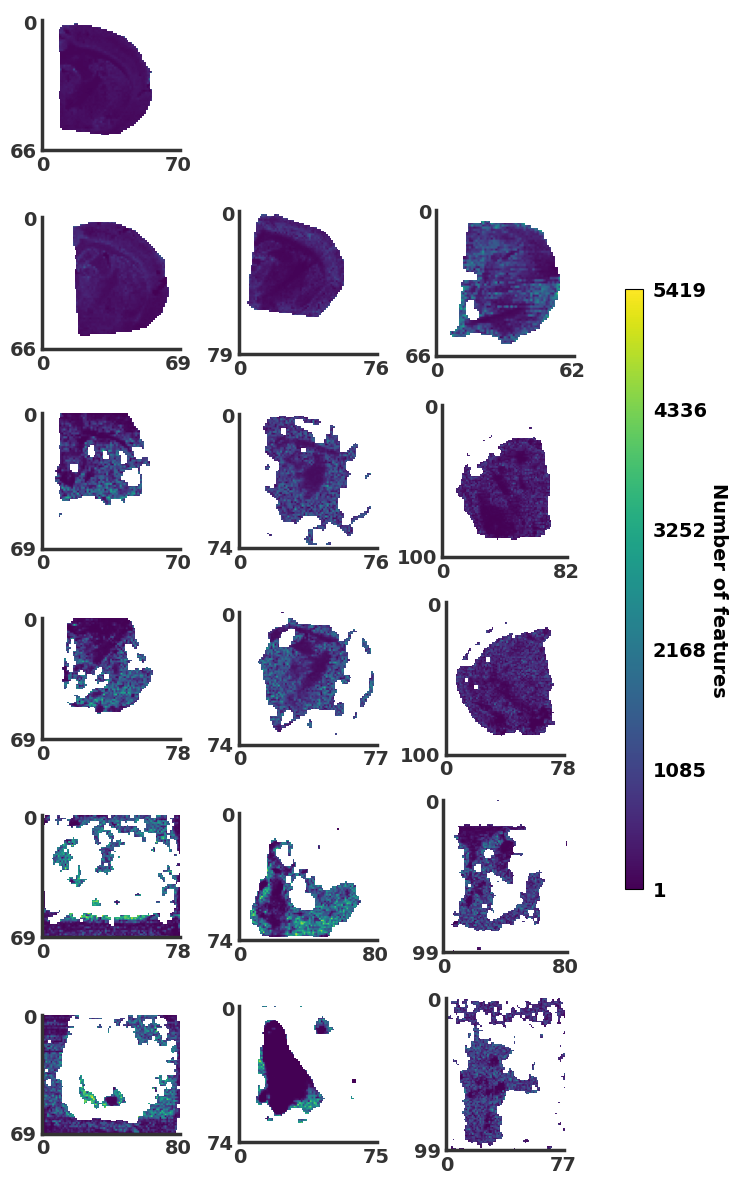

In [181]:
# Add color bar max = 95 percentile.

# Dictionary to store spatial number of features for each sample
spatial_num_features = {}
# Loop through each parser and calculate spatial number of features
for name, p in parsers.items():
  spatial_num_features[name] = msi_spatial_num_features(p, masks[name], 0.25)

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

vmin = np.min(
    [np.min(val[~np.isnan(val)]) for name, val in spatial_num_features.items()]
)
vmax = np.percentile(
    [np.max(val[~np.isnan(val)]) for name, val in spatial_num_features.items()],
    95
)
norm = Normalize(vmin=vmin, vmax=vmax)

# Grouping the DataFrame
grouped = metadata_df.groupby("sample_number")

# Determine the layout of the subplot grid
max_images_in_group = grouped.size().max()
num_groups = len(grouped)

# Adjust the number of rows for groups after the first
max_rows = max_images_in_group if num_groups == 1 else max_images_in_group

# Creating subplots
fig, axs = plt.subplots(
    max_rows, num_groups, figsize=(num_groups * 2, max_rows * 2)
)

# Ensure axs is a 2D array
if num_groups == 1:
  axs = np.expand_dims(axs, axis=-1)
if max_rows == 1:
  axs = np.expand_dims(axs, axis=0)

# Plotting each image in the appropriate subplot
for group_index, (key, group) in enumerate(grouped):
  for image_index, (_, row) in enumerate(group.iterrows()):
    # Determine the subplot index
    subplot_index = image_index if group_index == 0 else image_index + 1

    ax = axs[subplot_index, group_index]
    try:
      img = spatial_num_features[row.sample_file_name]
      im = ax.imshow(img, norm=norm)

      # Customize the ticks
      ax.set_xticks([0, img.shape[1] - 1])
      ax.set_yticks([0, img.shape[0] - 1])
      ax.tick_params(axis='both', length=0)
      for yticklabel in ax.get_yticklabels():
        yticklabel.set_fontweight('bold')
        yticklabel.set_fontsize(14)
        yticklabel.set_color('0.2')
      for xticklabel in ax.get_xticklabels():
        xticklabel.set_fontweight('bold')
        xticklabel.set_fontsize(14)
        xticklabel.set_color('0.2')

      # Customize the spines
      for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
    except FileNotFoundError:
      ax.axis('off')  # Hide axes if file not found
      print(f"File not found: {row['ImagePath']}")

  # Turn off unused subplots
  for ax in axs[len(group) + (0 if group_index == 0 else 1):, group_index]:
    ax.axis('off')

  # Specifically turn off the skipped subplot for non-first groups
  if group_index != 0:
    axs[0, group_index].axis('off')

sm = ScalarMappable(norm=norm)
sm.set_array([])

cbar_ax = fig.add_axes([1.05, 0.25, 0.03, 0.5])
bar = fig.colorbar(sm, cax=cbar_ax)

bar.set_label(
    'Number of features', rotation=270, labelpad=15, fontweight='bold',
    fontsize=14
)
bar.ax.tick_params(labelsize=14, width=0)
for l in bar.ax.get_yticklabels():
  l.set_fontweight('bold')
# Set the ticks for the color bar
ticks = np.linspace(vmax, vmin, 6)
bar.set_ticks(ticks)
bar.set_ticklabels(['{:.0f}'.format(t) for t in ticks])

plt.tight_layout()
plt.show()